In [2]:
import notebook_hana_connector.notebook_hana_connector
di_connection = notebook_hana_connector.notebook_hana_connector.get_datahub_connection(id_="S3")
access_key = di_connection["contentData"]["accessKey"]
secret_key = di_connection["contentData"]["secretKey"]

In [3]:
# import boto3
# client = boto3.client('s3', aws_access_key_id=access_key, 
#                             aws_secret_access_key=secret_key)

from minio import Minio
from minio.error import ResponseError
import pandas as pd
import io

minioClient = Minio('sapdatahub.com:9000', access_key=access_key, secret_key=secret_key, secure=True)

# -- List Buckets
# buckets = minioClient.list_buckets()
# for bucket in buckets:
#     print(bucket.name, bucket.creation_date)

# Get csv file from minio S3 bucket.
try:
    csvFile = minioClient.get_object('bucket1', 'RunningTimes.csv')
    body = csvFile.data
    csv_string = body.decode('utf-8')
    df_data = pd.read_csv(io.StringIO(csv_string), sep=";")
    
except ResponseError as err:
    print(err)
    
df_data.head(5)

,ID,HALFMARATHON_MINUTES,MARATHON_MINUTES
0,1,73,149
1,2,74,154
2,3,78,158
3,4,73,165
4,5,74,172


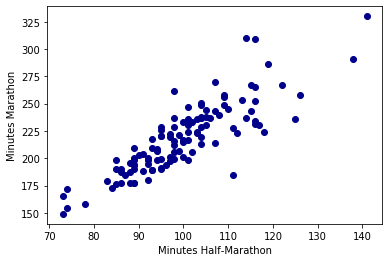

In [4]:
x = df_data[["HALFMARATHON_MINUTES"]]
y_true = df_data["MARATHON_MINUTES"]

%matplotlib inline
import matplotlib.pyplot as plot
plot.scatter(x, y_true, color = 'darkblue');
plot.xlabel("Minutes Half-Marathon");
plot.ylabel("Minutes Marathon");

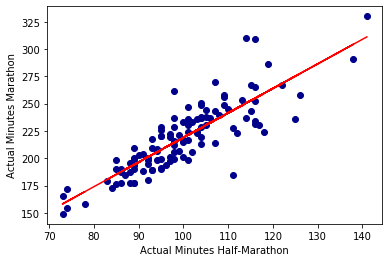

In [5]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x, y_true)

plot.scatter(x, y_true, color = 'darkblue');
plot.plot(x, lm.predict(x), color = 'red');
plot.xlabel("Actual Minutes Half-Marathon");
plot.ylabel("Actual Minutes Marathon");

In [6]:
import numpy as np
y_pred = lm.predict(x)
mse = np.mean((y_pred - y_true)**2)
rmse = np.sqrt(mse)
rmse = round(rmse, 2)
print("RMSE: " , str(rmse))
print("n: ", str(len(x)))

RMSE:  16.96
n:  117


In [7]:
import pickle
pickle.dump(lm, open("marathon_lm.pickle.dat", "wb"))

Package                 Version  
----------------------- ---------
asn1crypto              0.24.0   
attrs                   19.3.0   
backcall                0.1.0    
bleach                  3.1.0    
certifi                 2019.9.11
cffi                    1.12.3   
chardet                 3.0.4    
cloudpickle             0.5.2    
conda                   4.7.10   
conda-package-handling  1.3.11   
cryptography            2.7      
cycler                  0.10.0   
decorator               4.4.0    
defusedxml              0.6.0    
docopt                  0.6.2    
entrypoints             0.3      
environs                5.2.1    
future                  0.17.1   
hana-ml                 1.0.5    
hdbcli                  2.4.142  
hdfs                    2.5.0    
idna                    2.8      
importlib-metadata      0.23     
ipykernel               5.1.2    
ipython                 7.8.0    
ipython-genutils        0.2.0    
jedi                    0.15.1   
Jinja2        